In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bbc-text.csv')
X=(df.iloc[:,1:])
y=df.iloc[:,0]

In [3]:
X['text']=X['text'].str.lower()

In [4]:
X['text']=X['text'].str.replace("(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "")

In [5]:
import nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
X['text']=X['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [6]:
from nltk.tokenize import word_tokenize
X['text'] = X['text'].apply(nltk.word_tokenize)
X['text']

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, exchats...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 2225, dtype: object

In [7]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
X['text']=X['text'].apply(lambda x: [snow_stemmer.stem(y) for y in x])
X['text']

0       [tv, futur, hand, viewer, home, theatr, system...
1       [worldcom, boss, left, book, alon, former, wor...
2       [tiger, wari, farrel, gambl, leicest, say, rus...
3       [yead, face, newcastl, fa, cup, premiership, s...
4       [ocean, twelv, raid, box, offic, ocean, twelv,...
                              ...                        
2220    [car, pull, us, retail, figur, us, retail, sal...
2221    [kilroy, unveil, immigr, polici, exchatshow, h...
2222    [rem, announc, new, glasgow, concert, us, band...
2223    [polit, squabbl, snowbal, becom, commonplac, a...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 2225, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer( analyzer=lambda x: x)
X_train_N= co.fit(X_train['text'])
#X_train_N.vocabulary_

In [10]:
X_train_NT=co.transform(X_train['text'])

In [11]:
X_test_NT=co.transform(X_test['text'])

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer().fit(X_train_NT)
X_train_NTF=tf.transform(X_train_NT)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train_NTF,y_train)
pre=model.predict(X_test_NT)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pre))

               precision    recall  f1-score   support

     business       0.96      0.94      0.95       164
entertainment       1.00      0.88      0.93       113
     politics       0.87      0.99      0.93       113
        sport       0.98      0.99      0.99       146
         tech       0.97      0.97      0.97       132

     accuracy                           0.96       668
    macro avg       0.96      0.95      0.95       668
 weighted avg       0.96      0.96      0.96       668



[[154   0   9   0   1]
 [  4  99   7   0   3]
 [  1   0 112   0   0]
 [  0   0   1 145   0]
 [  1   0   0   3 128]]


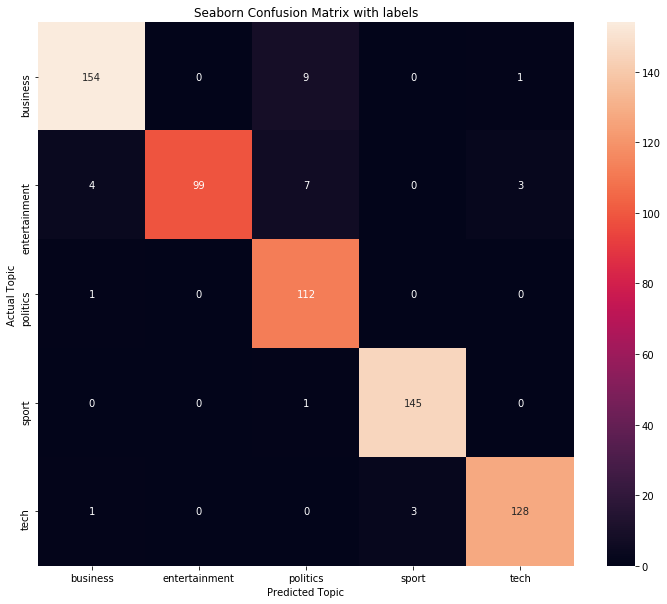

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,pre)
plt.figure(figsize = (12,10))
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Topic')
ax.set_ylabel('Actual Topic');
ax.xaxis.set_ticklabels(['business', 'entertainment', 'politics','sport','tech'])
ax.yaxis.set_ticklabels(['business', 'entertainment', 'politics','sport','tech'])
print(cm)